In [7]:
from gensim.models.fasttext import FastText

In [9]:
import psycopg2

con = psycopg2.connect(
  database="db_dsa", 
  user="udsa", 
  password="P@ssword2021", 
  host="92.242.58.173", 
  port="1984"
)

print("Database opened successfully")

Database opened successfully


/opt/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [10]:
import pandas as pd
cur = con.cursor()
cur.execute("SELECT * from PROJECTS")
rows = cur.fetchall()
column_names=["ID","NUMBER","VACANCIES","NAME","TYPE","TYPEDESC","TYPEID","STATUSID", "STATUSDESC","DIRECTIONHEAD","HEAD","DATACREATED","FACULTYID"]
df = pd.DataFrame(rows, columns=column_names)
df.head()

,ID,NUMBER,VACANCIES,NAME,TYPE,TYPEDESC,TYPEID,STATUSID,STATUSDESC,DIRECTIONHEAD,HEAD,DATACREATED,FACULTYID
0,205,NaN,2,Численное и аналитическое исследование эффекта...,nir,НИР,1,1,Готов к работе,Данилов Владимир Григорьевич,Данилов Владимир Григорьевич,08.05.2020 21:25:02,None
1,208,NaN,3,"Исследование механизмов образования, способов ...",nir,НИР,1,1,Готов к работе,,Грачев Николай,11.05.2020 14:07:40,None
2,215,NaN,1,Разработка моста переменного тока,soft-hard,Прогр-аппарат.,3,1,Готов к работе,,Балакин Станислав,13.05.2020 16:41:39,None
3,216,NaN,3,Разработка нательных антенн и излучателей для ...,soft-hard,Прогр-аппарат.,3,1,Готов к работе,Елизаров Андрей Альбертович,Скуридин Андрей,13.05.2020 17:00:19,None
4,218,NaN,0,Разработка глоссария физических терминов для м...,soft,Прогр.,2,1,Готов к работе,,Гузенкова Александра Сергеевна,13.05.2020 19:38:43,None


In [11]:
df1 = df[['NAME']]
df2 = df1.apply(lambda x: ';'.join(x.astype(str)), axis=1)
df_clean = pd.DataFrame({'clean': df2})
sent = [row.split(';') for row in df_clean['clean']]
sent[0]

['Численное и аналитическое исследование эффекта Саффмана-Тейлора']

In [16]:
model = FastText(sent, min_count=1, vector_size=300, workers=3, window=3, sg=1)

In [18]:
model.wv['Разработка моста переменного тока']

array([ 4.19034070e-04, -2.43940638e-04,  1.19569610e-04, -3.88629007e-04,
        1.37812473e-04,  1.58672265e-05, -3.82281723e-05, -2.31111917e-05,
        1.17315714e-04,  1.86296747e-04,  9.79648466e-05, -1.82067583e-04,
       -1.72612519e-04,  3.40346196e-05,  2.81431188e-04, -1.71509615e-04,
        7.64072538e-05, -8.73690151e-05,  2.18714020e-04, -1.02509315e-04,
        1.05305364e-04,  2.42573995e-04, -1.34469708e-04, -5.39601133e-05,
        4.47669154e-05, -2.65622308e-04,  1.33479363e-04, -2.73423211e-04,
       -2.07835197e-04, -2.52096739e-04, -1.75750931e-04,  2.11759325e-05,
       -3.55266529e-04,  2.69089796e-04,  3.81056634e-05,  1.81857205e-04,
        1.81333344e-05,  1.44663514e-04, -2.92082463e-04,  1.47059682e-05,
        5.13942950e-06,  2.32193081e-04, -1.83918935e-04, -7.85708471e-06,
        1.97883492e-05, -2.96678656e-04,  1.09686451e-04, -1.54678448e-04,
        9.31197646e-05,  1.45472673e-04,  1.46739592e-04,  3.23568791e-04,
       -3.47000838e-04, -

In [20]:
model.wv.similarity(w1='Численное и аналитическое исследование эффекта Саффмана-Тейлора', w2='Разработка моста переменного тока')

0.041721065

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    close_words = model.wv.most_similar([word])

    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    reduc = PCA(n_components=20).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

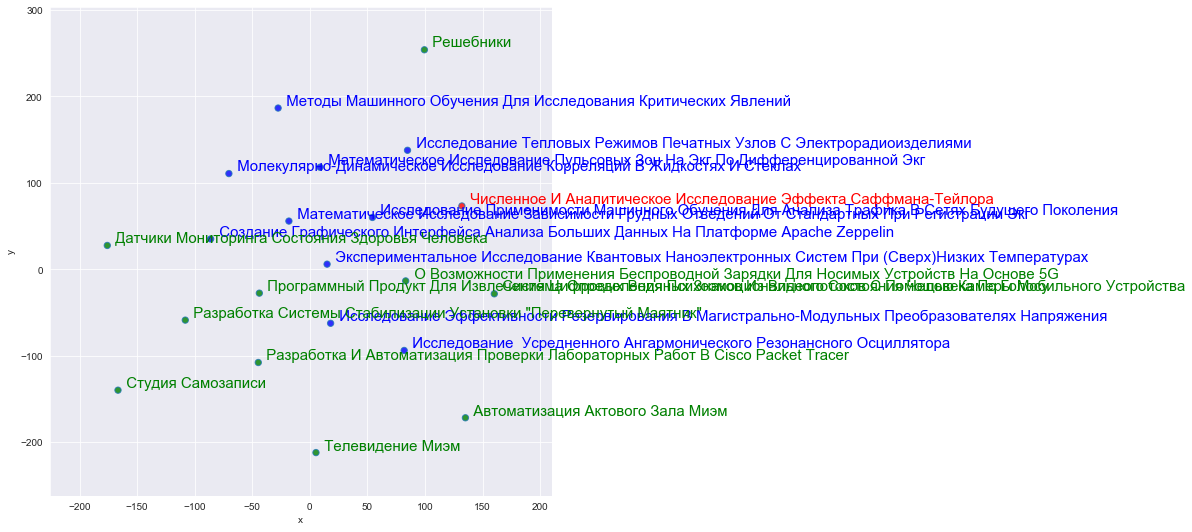

In [22]:
tsnescatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', [i[0] for i in model.wv.most_similar(negative=["Численное и аналитическое исследование эффекта Саффмана-Тейлора"])])